## Formal Simulated Inference

### Step 1: Define formal test

**all wrong. forget it.**

If our brains are samples X<sub>i</sub> in \mathcal\{X\}, then the observed graphs are Y<sub>i</sub><sup>q</sup> = f<sub>q</sub>(X<sub>i</sub>), for processing strategies f<sub>q</sub> where q=1,...,Q, and where f<sub>q</sub>: X<sub>i</sub> \sim Y<sub>i</sub>. If we are asking whether or not using the same functional f improves descriminability, our alernate and hypothesis and null become:

p( ||A<sub>xy</sub> - A<sub>x'y</sub>|| \leq || A<sub>xy</sub> - A<sub>x'y'</sub> || ), where x is the graph observed and y is the label associated with the observed graph. If a superscript indicates processing technique, we have:

*H<sub>A</sub>*: p( ||Y<sub>ij</sub><sup>q</sup> - Y<sub>ij'</sub><sup>q</sup>|| < || Y<sub>ij</sub><sup>q</sup> - Y<sub>i'j'</sub><sup>q'</sup> || ) <br/>
*H<sub>0</sub>*: p( ||Y<sub>ij</sub><sup>q</sup> - Y<sub>ij'</sub><sup>q</sup>|| \geq || Y<sub>ij</sub><sup>q</sup> - Y<sub>i'j'</sub><sup>q'</sup> || )

In [1]:
"""Step 2: Sample data from null"""

import numpy as np

# define number of rois
n=70

# define number of subjects per class
S=150
s0 = S/2
s1 = S-s0

# sample graph distribution: G_i ~ ER(p_i)
g0 = 1 * (np.random.rand( n, n, s0) > 0.50) # (null), 0.52 (classes)
g1 = 1 * (np.random.rand( n, n, s1) > 0.50) # (null), 0.48 (classes)

# compute feature of data
mbar0 = np.sum(g0, axis=(0,1))
mbar1 = np.sum(g1, axis=(0,1))


In [2]:
"""Step 3: Test hypothesis"""

from scipy import stats

# compute t-test on feature
p = stats.ttest_ind(mbar0, mbar1)[1]

result = p < 0.05
print "p-value: " + str(p)
print "We can reject the null model with 95% certainty: " + str(result)

p-value: 0.655607297948
We can reject the null model with 95% certainty: False


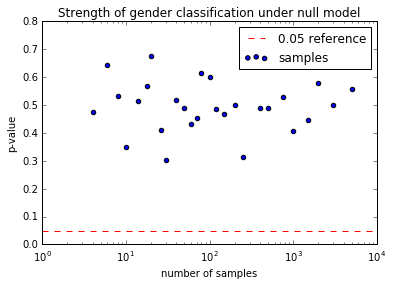

In [3]:
"""Step 4: Repeat analysis over varying sample sizes and plot"""

import matplotlib.pyplot as plt
import itertools

%matplotlib inline

S = np.array((4, 6, 8, 10, 14, 18, 20, 26, 30, 40,
              50, 60, 70, 80, 100, 120, 150, 200, 250,
              300, 400, 500, 750, 1000, 1500, 2000,
              3000, 5000))

pvals = np.array((), dtype=np.dtype('float64'))
# compute this statistic for various sizes of datasets
for s in S:
    s0 = s/2
    s1 = s - s0

    # compute this many times for each operating point to get average
    p = np.array((), dtype=np.dtype('float64'))    
    for _ in itertools.repeat(None,10):
        g0 = 1 * (np.random.rand( n, n, s0) > 0.5) # (null), 0.52 (classes)
        g1 = 1 * (np.random.rand( n, n, s1) > 0.5) # (null), 0.48 (classes)

        # compute feature of data
        mbar0 = np.sum(g0, axis=(0,1))
        mbar1 = np.sum(g1, axis=(0,1))

        # compute t-test on feature
        p = np.append(p, stats.ttest_ind(mbar0, mbar1)[1])
    
    # record average p value at operating point
    pvals = np.append(pvals, np.mean(p))

# plot
plt.scatter(S, pvals, hold=True, label='samples')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('p-value')
plt.title('Strength of gender classification under null model')
plt.axhline(0.05, color='red', linestyle='--', label='0.05 reference')
plt.legend()
plt.show()
